<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [33]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2024-12-12 01:57:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: 'survey-results-public.sqlite.1'

     0K .......... .......... .......... .......... ..........  0%  901K 3m49s
    50K .......... .......... .......... .......... ..........  0% 1.53M 3m0s
   100K .......... .......... .......... .......... ..........  0% 5.98M 2m11s
   150K .......... .......... .......... .......... ..........  0% 2.96M 1m56s
   200K .......... .......... .......... .......... ..........  0% 1.44M 2m0s
   

#### 2. Connect to the Database


**Install the needed libraries**


In [34]:
!pip install pandas

In [35]:
!pip install matplotlib

In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [37]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [38]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [39]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


Text(0.5, 1.0, 'Box Plot of Total Compensation')

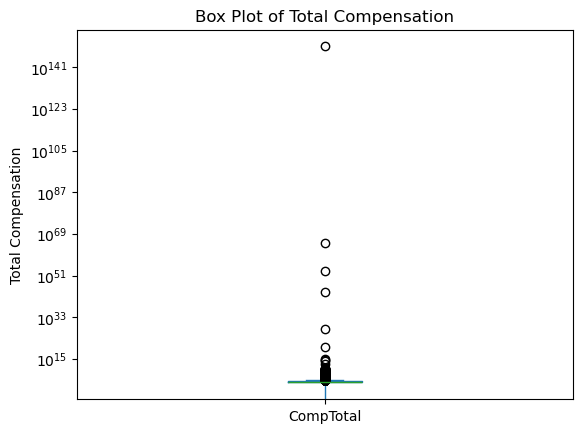

In [40]:
# your code goes here
QUERY = "SELECT CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

df['CompTotal'].plot(kind='box')
plt.ylabel('Total Compensation')
plt.yscale('log')
plt.title('Box Plot of Total Compensation')

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


C:\Users\pangr\AppData\Local\Temp\ipykernel_29372\85342953.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_numeric'].fillna(df['Age_numeric'].median(),inplace=True)


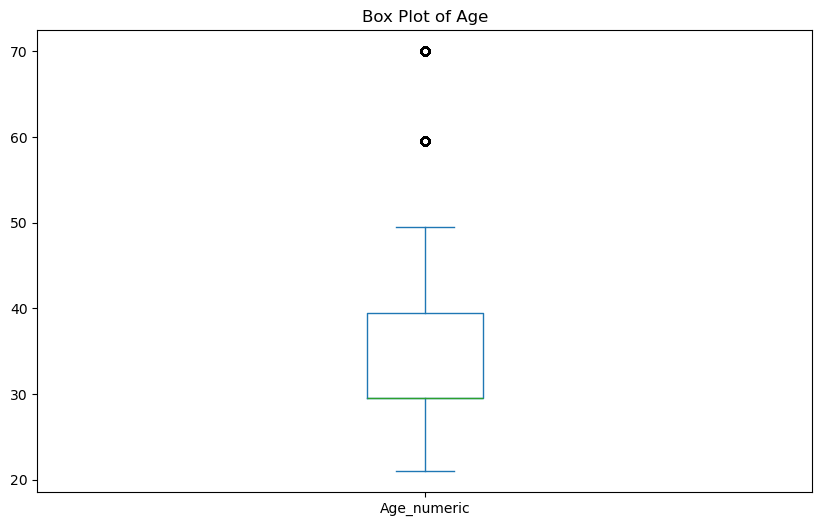

In [42]:
# your code goes here

QUERY = "SELECT Age FROM main where Age IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)
# Create a age mapping for age calculation
age_mapping = {
    'under 18 years old': 17,
    '18-24 years old': (18 + 24) / 2,
    '25-34 years old': (25 + 34) / 2,
    '35-44 years old': (35 + 44) / 2,
    '45-54 years old': (45 + 54) / 2,
    '55-64 years old': (55 + 64) / 2,
    '65 years or older': 70,
    'Prefer not to say': 30
}
df['Age_numeric'] = df['Age'].map(age_mapping)
df['Age_numeric'] = pd.to_numeric(df['Age_numeric'], errors='coerce')
df['Age_numeric'].fillna(df['Age_numeric'].median(),inplace=True)

#Plot a box plot
plt.figure(figsize=(10, 6))
df['Age_numeric'].plot(kind='box')
plt.title('Box Plot of Age')
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


Text(0, 0.5, 'Total Compensation')

<Figure size 1000x600 with 0 Axes>

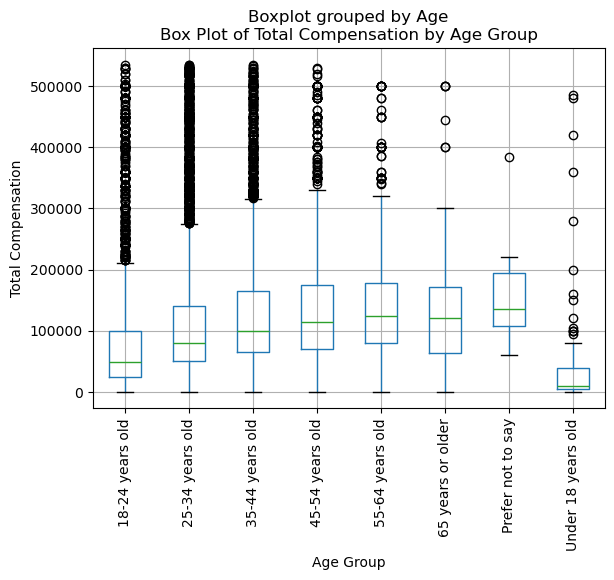

In [51]:
# your code goes here
QUERY = "SELECT Age, CompTotal FROM Main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

#Remove outliner of CompTotal
# 1. Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Remove outliners
df_no_outliers = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

plt.figure(figsize=(10, 6))
df_no_outliers.boxplot(column='CompTotal', by='Age')
plt.xticks(rotation=90)
plt.title('Box Plot of Total Compensation by Age Group')
plt.xlabel('Age Group')

plt.ylabel('Total Compensation')

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


Text(0, 0.5, 'Total Compensation')

<Figure size 1000x600 with 0 Axes>

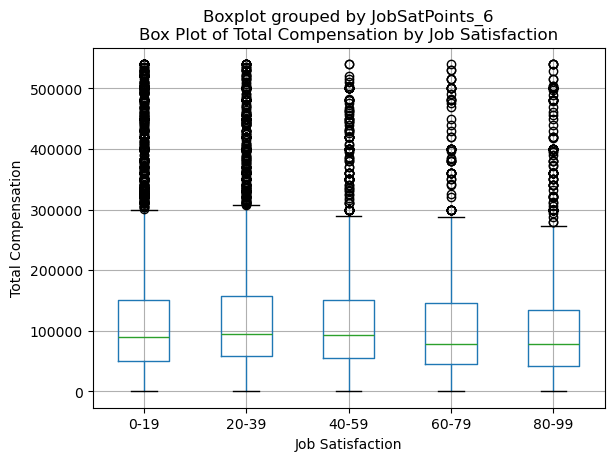

In [53]:
# your code goes here
QUERY = "SELECT JobSatPoints_6, CompTotal FROM Main WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Define bins and labels for JobSat ranges
bins = [0, 20, 40, 60, 80,  float('inf')]  # Bin edges
labels = ["0-19", "20-39", "40-59", "60-79","80-99"]

# Replace JobSat with JobSat ranges
df['JobSatPoints_6'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, right=False)

#Remove outliner of CompTotal
# 1. Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Remove outliners
df_no_outliers = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

#plot a graph
plt.figure(figsize=(10, 6))
df_no_outliers.boxplot(column='CompTotal', by='JobSatPoints_6')

plt.title('Box Plot of Total Compensation by Job Satisfaction')
plt.xlabel('Job Satisfaction')

plt.ylabel('Total Compensation')

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1000x600 with 0 Axes>

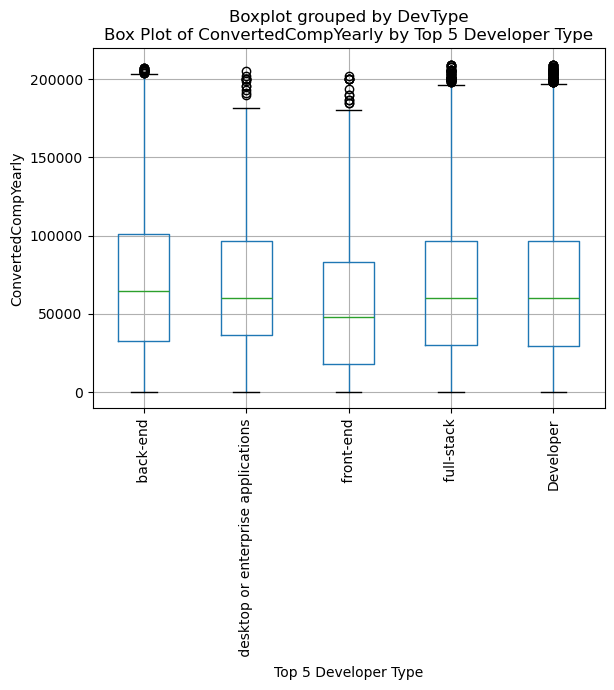

In [55]:
# your code goes here
QUERY = "SELECT DevType, ConvertedCompYearly FROM Main WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

df['DevType'] = df['DevType'].str.split(',')
df = df.explode('DevType')
df.reset_index(drop=True, inplace=True)
df['DevType'].value_counts().head(5)
top_5_dev_types = df['DevType'].value_counts().head(5).index
df = df[df['DevType'].isin(top_5_dev_types)]
df.reset_index(drop=True, inplace=True)

#Remove outliner of ConvertedCompYearly
# 1. Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Remove outliners
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]


plt.figure(figsize=(10, 6))
df_no_outliers.boxplot(column='ConvertedCompYearly', by='DevType')
plt.xticks(rotation=90)
plt.title('Box Plot of ConvertedCompYearly by Top 5 Developer Type')
plt.xlabel('Top 5 Developer Type')
plt.ylabel('ConvertedCompYearly')
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1000x600 with 0 Axes>

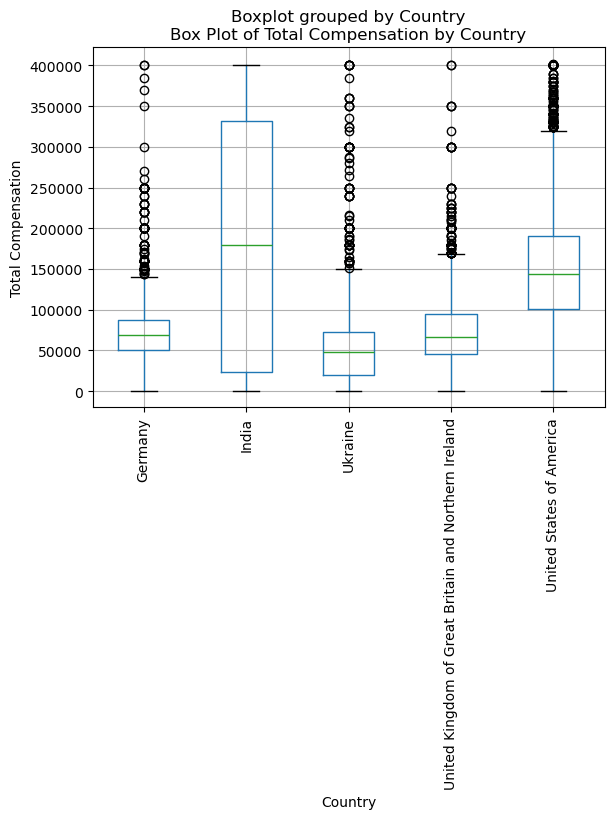

In [57]:
# your code goes here
QUERY = "SELECT Country, CompTotal FROM Main WHERE Country IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

top_5_countries = df['Country'].value_counts().head(5).index
df = df[df['Country'].isin(top_5_countries)]
df.reset_index(drop=True, inplace=True)

#Remove outliner of CompTotal
# 1. Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Remove outliners
df_no_outliers = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

#plot a graph
plt.figure(figsize=(10, 6))
df_no_outliers.boxplot(column='CompTotal', by='Country')
plt.xticks(rotation=90)
plt.title('Box Plot of Total Compensation by Country')
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1000x600 with 0 Axes>

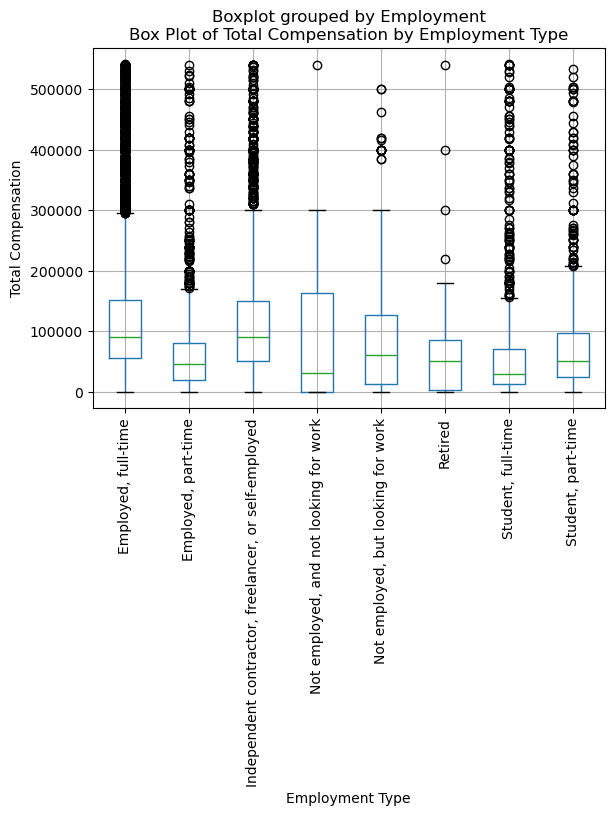

In [59]:
# your code goes here
QUERY = "SELECT Employment, CompTotal FROM Main WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

df['Employment'] = df['Employment'].str.split(';')
df = df.explode('Employment')
df.reset_index(drop=True, inplace=True)

#Remove outliner of CompTotal
# 1. Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Remove outliners
df_no_outliers = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

#plot a graph
plt.figure(figsize=(10, 6))
df_no_outliers.boxplot(column='CompTotal', by='Employment')
plt.xticks(rotation=90)
plt.title('Box Plot of Total Compensation by Employment Type') 
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.show()  




**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

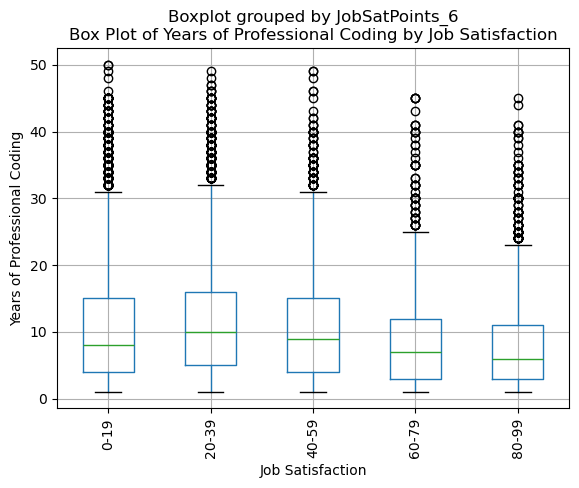

In [61]:
# your code goes here
QUERY = "SELECT JobSatPoints_6, YearsCodePro FROM Main WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define bins and labels for JobSat ranges
bins = [0, 20, 40, 60, 80,  float('inf')]  # Bin edges
labels = ["0-19", "20-39", "40-59", "60-79","80-99"]

# Replace JobSat with JobSat ranges
df['JobSatPoints_6'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, right=False)

# plot a graph
plt.figure(figsize=(10, 6))
df.boxplot(column='YearsCodePro', by='JobSatPoints_6')
plt.xticks(rotation=90)
plt.title('Box Plot of Years of Professional Coding by Job Satisfaction') 
plt.xlabel('Job Satisfaction')
plt.ylabel('Years of Professional Coding')
plt.show()



### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [63]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
